In [2]:
% Load Numerical Tours toolboxes
addpath('../toolbox_signal');
addpath('../toolbox_general');

In [5]:
% Number of pixels (n x n)
n = 90;

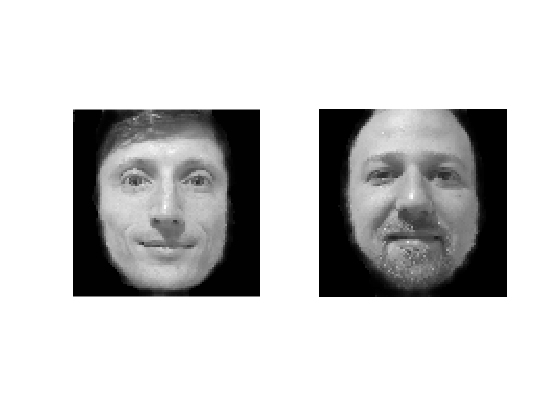

In [36]:
% Load and display images
F = rescale( load_image('faces/david', n) );
G = rescale( load_image('faces/riccardo', n) );
clf; imageplot({F G});

In [37]:
% Flatten into one dimensional array
flat = @(x)x(:);
Ff = flat(F(:,:,1)); Gf = flat(G(:,:,1));
n0 = size(Ff,1); n1 = size(Gf,1);

In [38]:
% Get 2D coordinates mapping for the flattened array
[XX,YY] = meshgrid(1:n,1:n);  X0 = [XX(:),YY(:)].'; X1 = [XX(:),YY(:)].';

In [39]:
% The cost matrix with the quadratic cost
C = repmat(sum(X0.^2)', [1 n1]) + repmat(sum(X1.^2), [n0 1]) - 2*X0'*X1;

In [40]:
% Normalize to unit mass
p = Ff/sum(Ff(:)); q = Gf/sum(Gf(:)); 

In [41]:
% Entropic regularization strength
lambda = 1;

In [42]:
% Sinkhorn's lightspeed algorithm
niter = 500;

xi = exp(-C/lambda);
b = ones(n1,1);
for i=1:niter
    a = p ./ (xi*b);
    b = q ./ (xi'*a);    
end

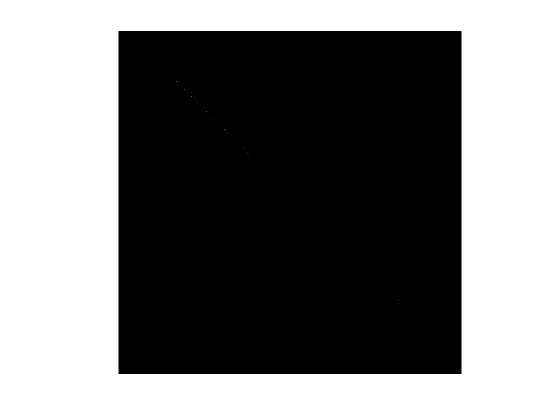

In [43]:
% Transport plan
gamma = diag(a)*xi*diag(b);
clf; imageplot(gamma);

In [44]:
%%file interpolate.m

% Compute the interpolation pushforward for a given t \in [0, 1]
function pt = interpolate(t, gamma)
    n = size(gamma, 1); sn = round(sqrt(n));
    
    pt = zeros(n, 1);
    for i = 1:n
        for j = 1:n
            xi = mod(i-1, sn); yi = floor((i-1)/sn);
            xj = mod(j-1, sn); yj = floor((j-1)/sn);
            
            xind = round((1-t)*xi + t*xj);
            yind = round((1-t)*yi + t*yj);
            ind = yind*sn + xind + 1;
            
            pt(ind) = pt(ind) + gamma(i, j);
        end
    end
    pt;
end

Created file 'C:\Users\s1453276\Numerical_tours\Faces interpolation\interpolate.m'.


In [45]:
% Unflatten
Ft = @(t) reshape(interpolate(t, gamma), [n, n, 1]);

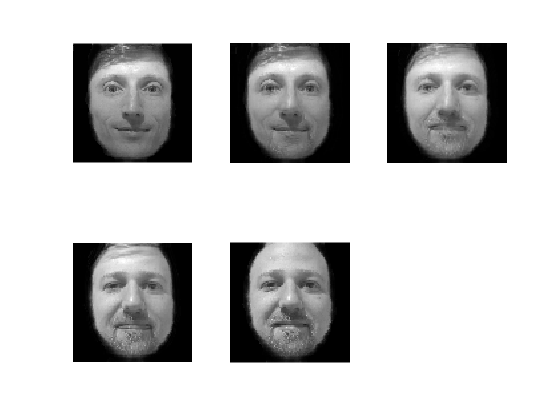

In [46]:
% Plot the interpolations
clf; imageplot(arrayfun(@(t){Ft(t)}, linspace(0, 1, 5)));